In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

In [ ]:
dataset = np.sin(np.arange(500)) + np.random.rand(500)*0.4
dataset = dataset.reshape(len(dataset),1)

In [ ]:
sca = MinMaxScaler()
dataset = sca.fit_transform(dataset)

In [ ]:
def prepare_data(dataset, start_index, end_index, history_size):
    X, y = [], []
    for i in range(start_index + history_size, end_index):
        X.append(dataset[i - history_size:i])
        y.append(dataset[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X.reshape((X.shape[0], X.shape[1], 1)), y.reshape(-1, 1)


train_split = int(len(dataset) * 0.7)
past_history = 10

X_train, y_train = prepare_data(dataset, 0, train_split, past_history)
X_test, y_test = prepare_data(dataset, train_split, len(dataset), past_history)

In [ ]:
model = keras.Sequential([
    keras.layers.LSTM(8, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dense(y_train.shape[1])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 8)                   │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 329 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
  X_train, y_train,
  epochs=70,
  batch_size=4,
  validation_split=0.1,
  verbose=1,
  shuffle=False
)

Epoch 1/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.1708 - val_loss: 0.0978
Epoch 2/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1007 - val_loss: 0.0942
Epoch 3/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0967 - val_loss: 0.0897
Epoch 4/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0916 - val_loss: 0.0828
Epoch 5/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0838 - val_loss: 0.0728
Epoch 6/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0722 - val_loss: 0.0545
Epoch 7/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0480 - val_loss: 0.0142
Epoch 8/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0216 - val_loss: 0.0112
Epoch 9/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - val_loss: 0.0106
Epoch 10/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - val_loss: 0.0124
Epoch 11/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0121
Epoch 12/70
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - val_lo

In [ ]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


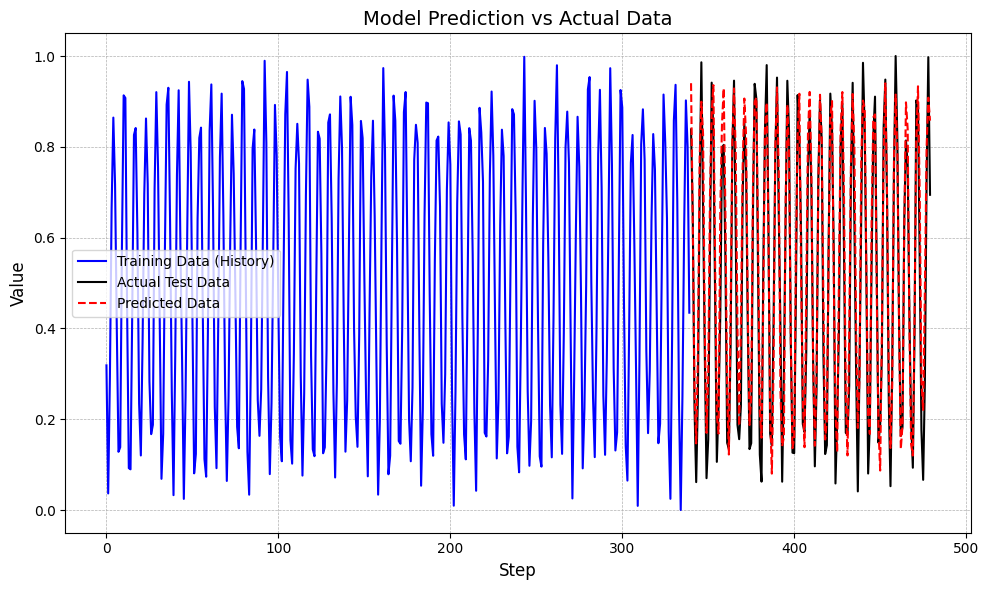

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(np.arange(0, len(y_train)), y_train, 'b', label="Training Data (History)")

plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_test,
    'k',
    markersize=3,
    label="Actual Test Data"
)

plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_pred,
    'r--',
    label="Predicted Data"
)

plt.ylabel('Value', fontsize=12)
plt.xlabel('Step', fontsize=12)
plt.title("Model Prediction vs Actual Data", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc="best", fontsize=10)
plt.tight_layout()
plt.show()

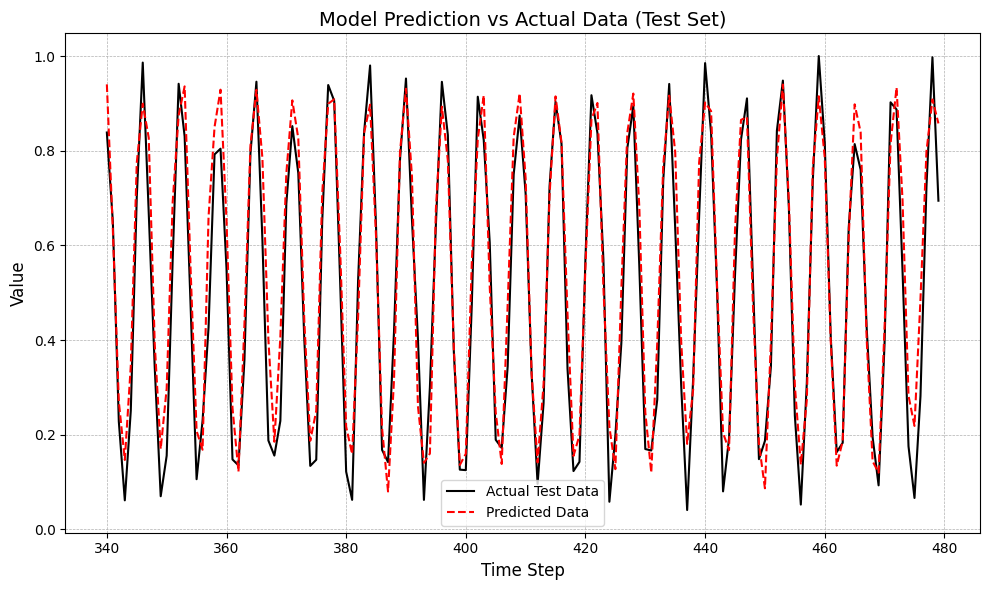

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_test,
    'k-',
    label="Actual Test Data"
)

plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_pred,
    'r--',
    linewidth=1.5,
    label="Predicted Data"
)

plt.ylabel('Value', fontsize=12)
plt.xlabel('Time Step', fontsize=12)
plt.title("Model Prediction vs Actual Data (Test Set)", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc="best", fontsize=10)
plt.tight_layout()
plt.show()